# Business Understanding

Given the Seattle and Boston Airbnb data, we came up the below business questions to answer:
      1.	Which neighborhoods Airbnb houses are the cheapest in Seattle and Boston?
      2.	What is price per night on different seasons? 
      3.	which types of rooms are most listed on Airbnb in Seattle compared with Boston?

We then csv files on both cities for calendar and listings which contains relevant raw data to make analysis out of. Two of the three questions, 1 and 3 were answered using the listings information since it had more details on price, room types and neighborhoods. 
The calendar information was used on second question since it had details on price and dates. Note be taken though that some conversion had to be done on date parameter in order to extract year, month, and date from date column such that our analysis could be monthly, and season based.
We assumed that neighborhood group means the same thing as neighborhood in a Seattle listings data since neighborhood column null values throughout.
Data virtualization for each city on every question has been made below.



In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

missing_values = ["N/A","N/a","na","NA",np.nan]
seattle_listings = pd.read_csv('C:/Users/pholoanaj/Downloads/NANODEGREE/SEATTLE/listings.csv',na_values=missing_values)
seattle_calendar = pd.read_csv('C:/Users/pholoanaj/Downloads/NANODEGREE/SEATTLE/calendar.csv',na_values=missing_values)

boston_listings = pd.read_csv('C:/Users/pholoanaj/Downloads/NANODEGREE/BOSTON/listings.csv',na_values=missing_values)
boston_calendar = pd.read_csv('C:/Users/pholoanaj/Downloads/NANODEGREE/BOSTON/calendar.csv',na_values=missing_values)



,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6606,2023-09-18,f,$99.00,$99.00,30,1125
1,6606,2023-09-19,f,$99.00,$99.00,30,1125
2,6606,2023-09-20,f,$99.00,$99.00,30,1125
3,6606,2023-09-21,t,$99.00,$99.00,30,1125
4,6606,2023-09-22,t,$99.00,$99.00,30,1125


In [95]:
#DATA UNDERSTANDING
seattle_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,month,year
0,6606,2023-09-18,f,99.0,99.0,30,1125,9,2023
1,6606,2023-09-19,f,99.0,99.0,30,1125,9,2023
2,6606,2023-09-20,f,99.0,99.0,30,1125,9,2023
3,6606,2023-09-21,t,99.0,99.0,30,1125,9,2023
4,6606,2023-09-22,t,99.0,99.0,30,1125,9,2023


In [96]:
boston_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,month,year
0,3781,2023-09-16,f,125.0,125.0,29,1125,9,2023
1,3781,2023-09-17,f,125.0,125.0,29,1125,9,2023
2,3781,2023-09-18,f,125.0,125.0,29,1125,9,2023
3,3781,2023-09-19,f,125.0,125.0,29,1125,9,2023
4,3781,2023-09-20,f,125.0,125.0,29,1125,9,2023


In [97]:
seattle_listings.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.823000e+03,6.823000e+03,6823.000000,6823.000000,6823.000000,6823.000000,6823.000000,6823.000000
mean,3.525649e+17,1.499893e+08,193.958669,11.784552,67.317309,31.654258,188.426352,17.804485
std,3.974132e+17,1.653001e+08,275.409663,24.305508,105.959383,85.310449,128.247196,23.138789
min,6.606000e+03,2.536000e+03,13.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2.790909e+07,1.821758e+07,108.000000,2.000000,3.000000,1.000000,72.000000,1.000000
50%,5.267547e+07,8.033375e+07,150.000000,2.000000,26.000000,2.000000,177.000000,8.000000
75%,7.538476e+17,2.415841e+08,220.000000,30.000000,85.000000,13.000000,320.000000,28.000000
max,9.820239e+17,5.360771e+08,10000.000000,999.000000,1319.000000,374.000000,365.000000,353.000000


In [98]:
boston_listings.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4.033000e+03,4.033000e+03,4033.000000,4033.000000,4033.000000,4033.000000,4033.000000,4033.000000
mean,3.116715e+17,1.547305e+08,241.616663,27.670469,45.792214,48.501116,190.749070,11.973717
std,3.903367e+17,1.505714e+08,313.285458,37.323371,89.241649,91.864389,128.426761,20.840220
min,3.781000e+03,4.804000e+03,20.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2.653275e+07,2.234822e+07,108.000000,1.000000,1.000000,2.000000,70.000000,0.000000
50%,4.975241e+07,1.074344e+08,183.000000,6.000000,8.000000,8.000000,197.000000,2.000000
75%,7.296586e+17,2.680891e+08,284.000000,32.000000,50.000000,44.000000,317.000000,16.000000
max,9.804836e+17,5.316613e+08,10000.000000,600.000000,894.000000,330.000000,365.000000,168.000000


In [99]:
seattle_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6823 entries, 0 to 6822
Data columns (total 13 columns):
id                                6823 non-null int64
name                              6823 non-null object
host_id                           6823 non-null int64
host_name                         6823 non-null object
neighbourhood_group               6823 non-null object
neighbourhood                     6823 non-null object
room_type                         6823 non-null object
price                             6823 non-null int64
minimum_nights                    6823 non-null int64
number_of_reviews                 6823 non-null int64
calculated_host_listings_count    6823 non-null int64
availability_365                  6823 non-null int64
number_of_reviews_ltm             6823 non-null int64
dtypes: int64(8), object(5)
memory usage: 746.3+ KB


In [100]:
boston_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4033 entries, 0 to 4032
Data columns (total 12 columns):
id                                4033 non-null int64
name                              4033 non-null object
host_id                           4033 non-null int64
host_name                         4033 non-null object
neighbourhood                     4033 non-null object
room_type                         4033 non-null object
price                             4033 non-null int64
minimum_nights                    4033 non-null int64
number_of_reviews                 4033 non-null int64
calculated_host_listings_count    4033 non-null int64
availability_365                  4033 non-null int64
number_of_reviews_ltm             4033 non-null int64
dtypes: int64(8), object(4)
memory usage: 409.6+ KB


In [101]:
#DATA PREPARATION
#Drop columns with all missing/null values
seattle_listings = seattle_listings.dropna(how="all")
seattle_calendar = seattle_calendar.dropna(how="all")
seattle_listings.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [47]:
boston_listings = boston_listings.dropna(how="all")
boston_calendar = boston_calendar.dropna(how="all")
boston_listings.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               4033
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        975
reviews_per_month                  975
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1480
dtype: int64

In [48]:
#Taking only useful columns for listings
seattle_listings = seattle_listings.reindex(columns=['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365','number_of_reviews_ltm'])
seattle_listings.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.823000e+03,6.823000e+03,6823.000000,6823.000000,6823.000000,6823.000000,6823.000000,6823.000000
mean,3.525649e+17,1.499893e+08,193.958669,11.784552,67.317309,31.654258,188.426352,17.804485
std,3.974132e+17,1.653001e+08,275.409663,24.305508,105.959383,85.310449,128.247196,23.138789
min,6.606000e+03,2.536000e+03,13.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2.790909e+07,1.821758e+07,108.000000,2.000000,3.000000,1.000000,72.000000,1.000000
50%,5.267547e+07,8.033375e+07,150.000000,2.000000,26.000000,2.000000,177.000000,8.000000
75%,7.538476e+17,2.415841e+08,220.000000,30.000000,85.000000,13.000000,320.000000,28.000000
max,9.820239e+17,5.360771e+08,10000.000000,999.000000,1319.000000,374.000000,365.000000,353.000000


In [49]:
boston_listings = boston_listings.reindex(columns=['id','name','host_id','host_name','neighbourhood','room_type','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365','number_of_reviews_ltm'])
boston_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4033 entries, 0 to 4032
Data columns (total 12 columns):
id                                4033 non-null int64
name                              4033 non-null object
host_id                           4033 non-null int64
host_name                         4033 non-null object
neighbourhood                     4033 non-null object
room_type                         4033 non-null object
price                             4033 non-null int64
minimum_nights                    4033 non-null int64
number_of_reviews                 4033 non-null int64
calculated_host_listings_count    4033 non-null int64
availability_365                  4033 non-null int64
number_of_reviews_ltm             4033 non-null int64
dtypes: int64(8), object(4)
memory usage: 409.6+ KB


In [52]:
#remove_moneysign function, replace $ on any column 
def remove_moneysign(df,col):
    '''
    INPUT:
    df - dataframe you want to remove money sign on
    col - column containing data with money sign
    
    OUTPUT:
    df - new dataframe with money sign removed from col data and value converted to numeric
    
    '''
    df[col] = pd.to_numeric(df[col].replace('[\$,]','',regex=True), errors='coerce')
    return df

seattle_calendar = remove_moneysign(seattle_calendar,'price')
seattle_calendar = remove_moneysign(seattle_calendar,'adjusted_price')
boston_calendar = remove_moneysign(boston_calendar,'price')
boston_calendar = remove_moneysign(boston_calendar,'adjusted_price')
#seattle_calendar['adjusted_price'] = pd.to_numeric(seattle_calendar['adjusted_price'].replace('[\$,]', '', regex=True), errors='coerce')
#boston_calendar['adjusted_price'] = pd.to_numeric(boston_calendar['adjusted_price'].replace('[\$,]', '', regex=True), errors='coerce')
boston_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3781,2023-09-16,f,125.0,125.0,29,1125
1,3781,2023-09-17,f,125.0,125.0,29,1125
2,3781,2023-09-18,f,125.0,125.0,29,1125
3,3781,2023-09-19,f,125.0,125.0,29,1125
4,3781,2023-09-20,f,125.0,125.0,29,1125


In [53]:
seattle_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6606,2023-09-18,f,99.0,99.0,30,1125
1,6606,2023-09-19,f,99.0,99.0,30,1125
2,6606,2023-09-20,f,99.0,99.0,30,1125
3,6606,2023-09-21,t,99.0,99.0,30,1125
4,6606,2023-09-22,t,99.0,99.0,30,1125


In [87]:
#Convert date to date to to year and month for better analysis
seattle_calendar['date'] = pd.to_datetime(seattle_calendar['date'])
boston_calendar['date'] = pd.to_datetime(boston_calendar['date'])
seattle_calendar['month'] = seattle_calendar['date'].dt.month
boston_calendar['month'] = boston_calendar['date'].dt.month
seattle_calendar['year'] = seattle_calendar['date'].dt.year
boston_calendar['year'] = boston_calendar['date'].dt.year
seattle_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,month,year
0,6606,2023-09-18,f,99.0,99.0,30,1125,9,2023
1,6606,2023-09-19,f,99.0,99.0,30,1125,9,2023
2,6606,2023-09-20,f,99.0,99.0,30,1125,9,2023
3,6606,2023-09-21,t,99.0,99.0,30,1125,9,2023
4,6606,2023-09-22,t,99.0,99.0,30,1125,9,2023


In [88]:
boston_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,month,year
0,3781,2023-09-16,f,125.0,125.0,29,1125,9,2023
1,3781,2023-09-17,f,125.0,125.0,29,1125,9,2023
2,3781,2023-09-18,f,125.0,125.0,29,1125,9,2023
3,3781,2023-09-19,f,125.0,125.0,29,1125,9,2023
4,3781,2023-09-20,f,125.0,125.0,29,1125,9,2023


In [104]:
#DATA ANALYSIS AND MODELING
# Calculate the average price per night for each month, year using a function get_avg_price
def get_avg_price(df,col1,col2_grpby,col3_grpby):
    '''
    INPUT:
    df - dataframe you want to average on 
    col1 - price column to average
    col2_grpby - first group by column
    col3_grpby - second group by column
    
    OUTPUT:
    df_avg - average price grouped by col2_grpby and col3_grpby
    
    '''
    df_avg = df.groupby([col2_grpby,col3_grpby])[col1].mean()
    return df_avg

seattle_average_price_per_month = get_avg_price(seattle_calendar,'price','year','month')
boston_average_price_per_month = get_avg_price(boston_calendar,'price','year','month')
#print(seattle_average_price_per_month)
print(boston_average_price_per_month)

year  month
2023  9        246.792462
      10       257.291322
      11       229.334854
      12       222.936892
2024  1        223.342441
      2        226.565669
      3        245.315454
      4        275.491751
      5        275.529271
      6        278.415753
      7        276.993697
      8        272.162554
      9        307.073784
Name: price, dtype: float64


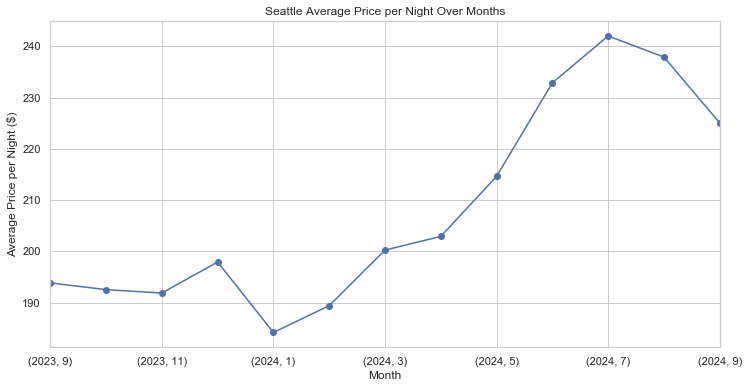

In [105]:
#DATA VISUALIZATION - Plotting Seattle price per night
plt.figure(figsize=(12, 6))
seattle_average_price_per_month.plot(marker='o', linestyle='-')
plt.title('Seattle Average Price per Night Over Months')
plt.xlabel('Month')
plt.ylabel('Average Price per Night ($)')
plt.grid(True)
plt.show()

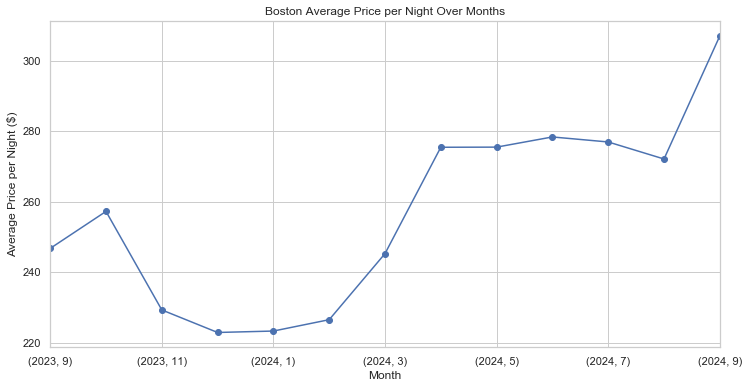

In [106]:
#DATA VISUALIZATION - Plotting Boston price per night

plt.figure(figsize=(12, 6))
boston_average_price_per_month.plot(marker='o', linestyle='-')
plt.title('Boston Average Price per Night Over Months')
plt.xlabel('Month')
plt.ylabel('Average Price per Night ($)')
plt.grid(True)
plt.show()

In [107]:
# Distribution of rooms Listings Across Seattle Neighborhoods

Seattle_neighborhood_counts = seattle_listings['neighbourhood_group'].value_counts().reset_index()
Seattle_neighborhood_counts.columns = ['Seattle_neighbourhood_group', 'Number of Listings']
Seattle_neighborhood_counts = Seattle_neighborhood_counts.sort_values(by='Number of Listings', ascending=False)
print(Seattle_neighborhood_counts)

   Seattle_neighbourhood_group  Number of Listings
0          Other neighborhoods                1394
1                     Downtown                 860
2                 Central Area                 624
3                 Capitol Hill                 604
4                   Queen Anne                 475
5                 West Seattle                 451
6                      Ballard                 418
7               Rainier Valley                 384
8                      Cascade                 297
9                  Beacon Hill                 294
10         University District                 252
11                   Northgate                 234
12                    Delridge                 218
13                   Lake City                 114
14                    Magnolia                 105
15                 Seward Park                  55
16                    Interbay                  44


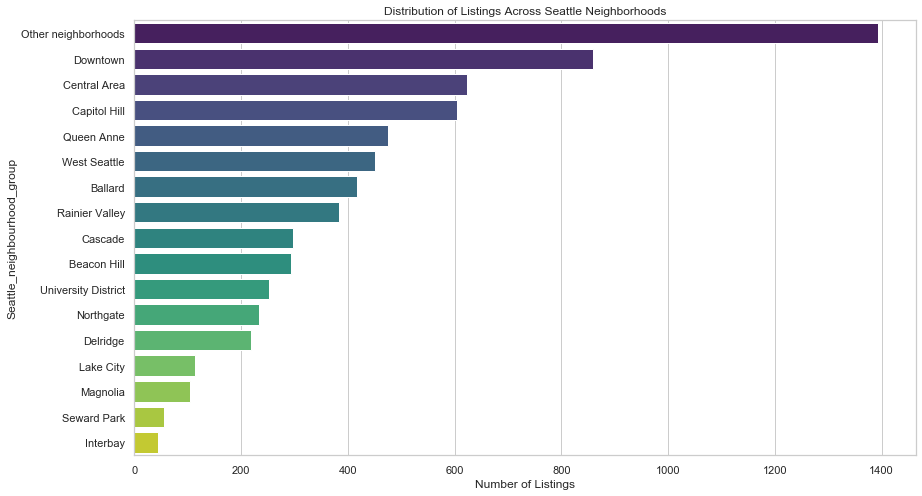

In [108]:
#DATA VISUALIZATION - Creating graph for Seattle listings per neighbprhood

sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.barplot(x='Number of Listings', y='Seattle_neighbourhood_group', data=Seattle_neighborhood_counts, palette='viridis')
plt.title('Distribution of Listings Across Seattle Neighborhoods')
plt.xlabel('Number of Listings')
plt.ylabel('Seattle_neighbourhood_group')
plt.show()

In [109]:
# Distribution of rooms Listings Across Boston Neighborhoods

Boston_neighborhood_counts = boston_listings['neighbourhood'].value_counts().reset_index()
Boston_neighborhood_counts.columns = ['Boston_neighbourhood', 'Number of Listings']
Boston_neighborhood_counts = Boston_neighborhood_counts.sort_values(by='Number of Listings', ascending=False)
print(Boston_neighborhood_counts)

       Boston_neighbourhood  Number of Listings
0                Dorchester                 493
1                  Downtown                 343
2                  Back Bay                 326
3                   Roxbury                 292
4                 South End                 286
5                  Brighton                 282
6             Jamaica Plain                 229
7               East Boston                 225
8                    Fenway                 214
9              South Boston                 188
10                  Allston                 183
11              Beacon Hill                 173
12                North End                 123
13                Chinatown                 100
14               Roslindale                  78
15              Charlestown                  77
16             Mission Hill                  69
17             West Roxbury                  64
18                 Mattapan                  61
19  South Boston Waterfront             

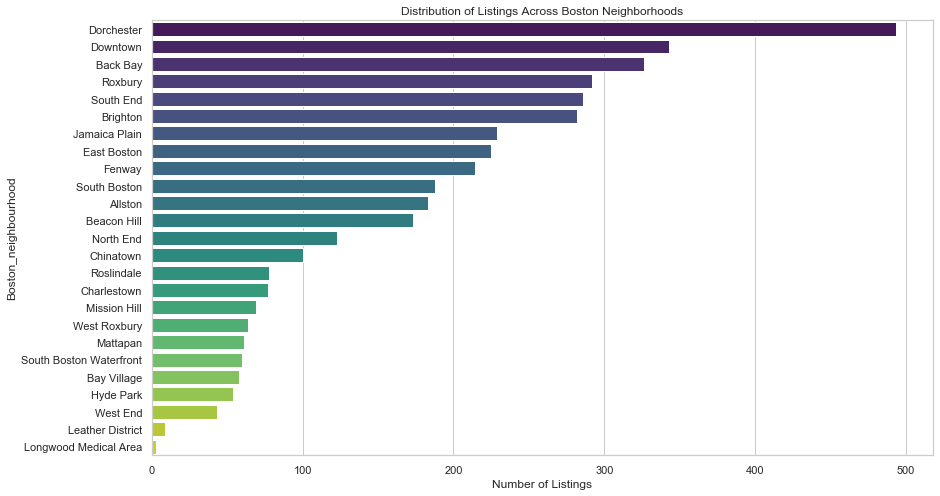

In [110]:
#DATA VISUALIZATION - Creating graph for Boston listings per neighbprhood

sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.barplot(x='Number of Listings', y='Boston_neighbourhood', data=Boston_neighborhood_counts, palette='viridis')
plt.title('Distribution of Listings Across Boston Neighborhoods')
plt.xlabel('Number of Listings')
plt.ylabel('Boston_neighbourhood')
plt.show()


In [111]:
# Calculate the average price per night in respective neighbourhoods and sort satrting with the cheapest

seattle_average_price_per_neighbourbood = seattle_listings.groupby(['neighbourhood_group'],as_index=False)['price'].mean().rename(columns={'price':'Avg_Price'})
boston_average_price_per_neighbourbood = boston_listings.groupby(['neighbourhood'],as_index=False)['price'].mean().rename(columns={'price':'Avg_Price'})

#seattle_average_price_per_neighbourbood = seattle_listings.groupby(['neighbourhood_group'])['price'].mean()
#boston_average_price_per_neighbourbood = boston_listings.groupby(['neighbourhood'])['price'].mean()
boston_average_price_per_neighbourbood = boston_average_price_per_neighbourbood.sort_values(by=['Avg_Price'],ascending=False)
seattle_average_price_per_neighbourbood = seattle_average_price_per_neighbourbood.sort_values(by=['Avg_Price'],ascending=False)
seattle_average_price_per_neighbourbood.head()

,neighbourhood_group,Avg_Price
12,Queen Anne,243.265263
11,Other neighborhoods,214.185079
6,Downtown,212.559302
9,Magnolia,211.276190
3,Cascade,196.488215


In [112]:
boston_average_price_per_neighbourbood.head()

,neighbourhood,Avg_Price
6,Chinatown,392.160000
8,Downtown,379.078717
17,North End,336.113821
1,Back Bay,327.536810
2,Bay Village,313.344828


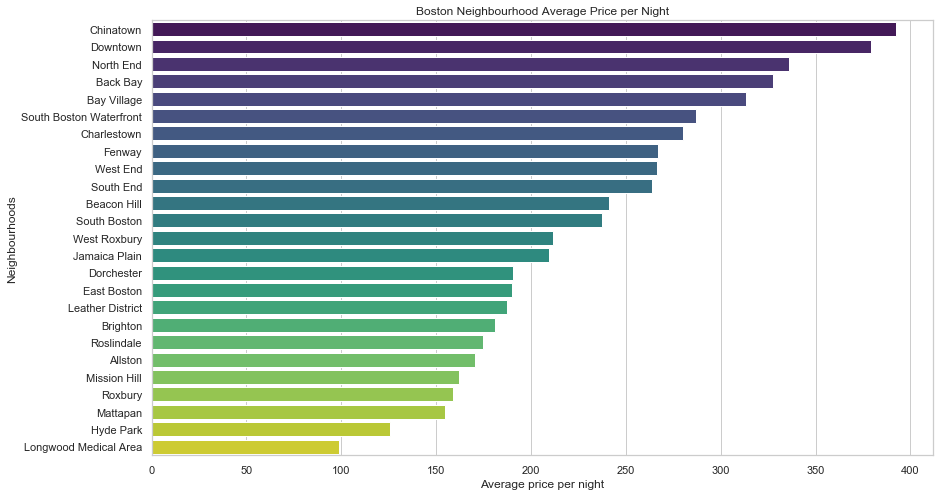

In [113]:
# Plotting Boston Neighbourhood Average Price per Night
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.barplot(x='Avg_Price', y='neighbourhood', data=boston_average_price_per_neighbourbood, palette='viridis')
plt.title('Boston Neighbourhood Average Price per Night')
plt.xlabel('Average price per night')
plt.ylabel('Neighbourhoods')
plt.show()

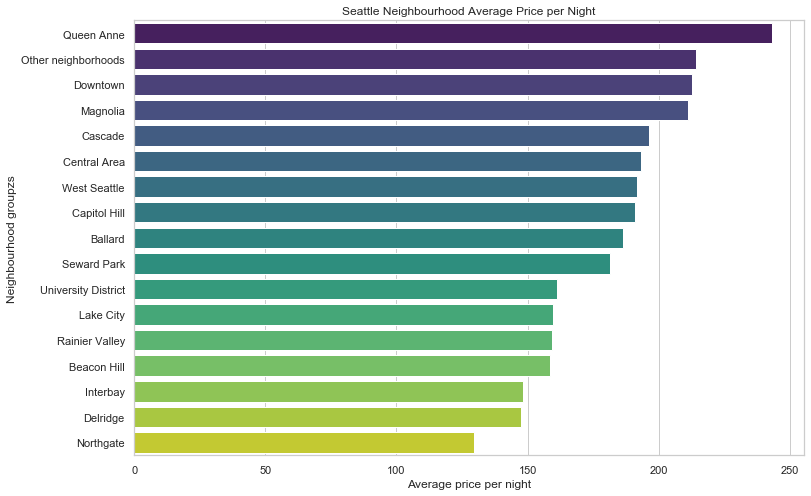

In [114]:
# Plotting Seattle Neighbourhood Average Price per Night

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='Avg_Price', y='neighbourhood_group', data=seattle_average_price_per_neighbourbood, palette='viridis')
plt.title('Seattle Neighbourhood Average Price per Night')
plt.xlabel('Average price per night')
plt.ylabel('Neighbourhood groupzs')
plt.show()

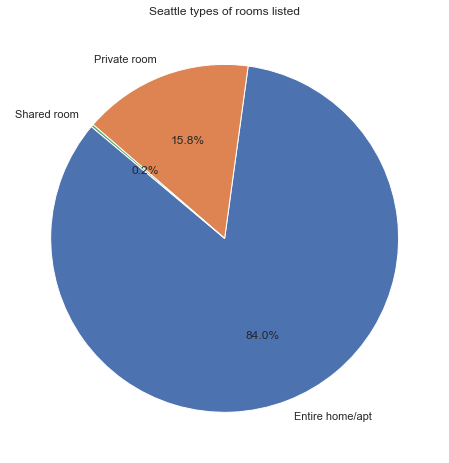

In [115]:
# Distribution of room types listed in Seattle
property_type_counts = seattle_listings['room_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(property_type_counts, labels=property_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Seattle types of rooms listed')
plt.show()

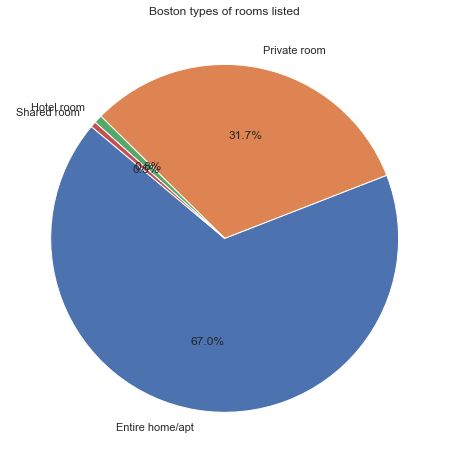

In [116]:
# Distribution of room types listed in Seattle
property_type_counts = boston_listings['room_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(property_type_counts, labels=property_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Boston types of rooms listed')
plt.show()

# Conclusion
In summary, we have looked at Airbnb data for two cities (Seattle and Boston) in order to uncover insights and patterns that reveal the dynamic between hosts, guests, and the diverse accommodations that two cities have to offer.

We gathered the fact that Airbnb houses in the two cities are cheaper during the winter season specifically in December and January. We further uncovered that Seattle is the cheaper of the two in December and that surprisingly, throughout the year, festive season rates of rooms in the two cities are at lowest.
We further looked at the which types of rooms are the most listed in the two cities. Entire home/ apt was the dominating type of room in both Seattle (84%) and Boston (67%).
Lastly, we looked at the cheapest neighborhoods Airbnb houses in relation to average price per night. Northgate and Longwood medical area were the neighborhoods with the cheapest Airbnb houses in Seattle and Boston respectively.